## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
!pip install geopandas



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 58.0 MB/s eta 0:00:00


# MOUNTING GOOGLE DRIVE


In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
path = '/content/drive/My Drive/'

IMPORTING DATA SETS FROM DRIVE

In [4]:
df = pd.read_csv("/content/drive/MyDrive/EDA CAPSTONE PROJECT/Airbnb NYC 2019.csv")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

FILLING NULL VALUES REVIEWS PERMONTH AS 0

In [10]:
df["reviews_per_month"].fillna(0,inplace=True)

DELETING ROWS WHICH HAS ZERO PRICE

In [11]:
drop_rows_index_list = df[df['price']==0].index.tolist()

In [12]:
df.drop(axis = 0, index= drop_rows_index_list, inplace = True)

In [13]:
df[df['availability_365']==0]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,36313048,Sunny room with private entrance in shared home,16883913,Tiffany,Queens,Ridgewood,40.69919,-73.89902,Private room,45,1,0,NaN,0.00,1,0
48731,36410519,Sunlight charming apt. in the heart of Brooklyn,121384174,Luciana Paula,Brooklyn,Park Slope,40.66716,-73.98101,Entire home/apt,111,8,0,NaN,0.00,1,0
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,0.00,1,0
48760,36420725,"Sunnyside, Queens 15 Mins to Midtown Clean & C...",19990280,Brandon,Queens,Sunnyside,40.74719,-73.91919,Private room,46,1,0,NaN,0.00,1,0


WHAT CAN WE LEARN ABOUT DIFFERENT HOST AND AREA?


In [14]:
neighbourhood_host_listings = df.groupby(['neighbourhood_group'])['id'].count()


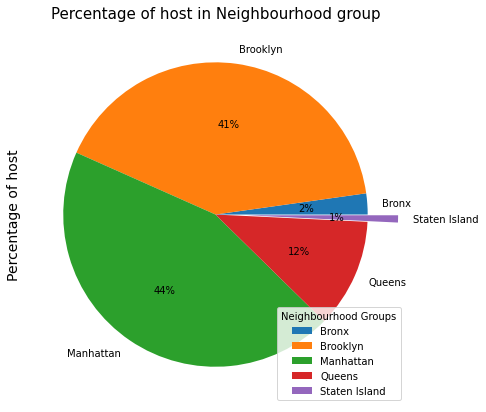

neighbourhood_group
Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: id, dtype: int64


In [15]:
from IPython.core.pylabtools import figsize
plt.rcParams['figure.figsize'] = (10, 7)
explode = [0,0,0,0,0.2]
ax = neighbourhood_host_listings.plot.pie(subplots=True,  autopct='%0.00f%%',explode = explode)


plt.title('Percentage of host in Neighbourhood group' , size = 15)
plt.ylabel('Percentage of host', size = 14)
plt.legend(title = 'Neighbourhood Groups', loc = 4)
plt.show()
print(neighbourhood_host_listings.sort_values(ascending = False))


As we can see most number of host listings are from Manhattan city followed by brooklyn.

2) What can we learn from predictions? (ex: locations, prices, reviews, etc)


In [16]:
calculated_host_listings_list = list(df['calculated_host_listings_count'].sort_values(ascending = False).unique())

In [17]:
calculated_host_listings_top_ten_count_list = calculated_host_listings_list[:10]

In [18]:
calculated_host_listings_top_ten_count_list

[327, 232, 121, 103, 96, 91, 87, 65, 52, 50]

In [19]:
top_ten_host_names = []
top_ten_host_ids = []
corresponding_neighbourhood_grp = []
for count in calculated_host_listings_top_ten_count_list:
  top_ten_host_names.extend(list(df[df['calculated_host_listings_count'] == count].host_name.unique()))
  top_ten_host_ids.extend(list(df[df['calculated_host_listings_count'] == count].host_id.unique()))
  corresponding_neighbourhood_grp.extend(list(df[df['calculated_host_listings_count'] == count].neighbourhood_group.unique()))

In [20]:
calculated_host_listings_top_ten_list = pd.DataFrame(zip(top_ten_host_ids,top_ten_host_names,corresponding_neighbourhood_grp,calculated_host_listings_top_ten_count_list),columns = ['Host id', 'Host name','neighbourhood_group','calculated_host_listings_count'])

In [21]:
calculated_host_listings_top_ten_list

,Host id,Host name,neighbourhood_group,calculated_host_listings_count
0,219517861,Sonder (NYC),Manhattan,327
1,107434423,Blueground,Manhattan,232
2,30283594,Kara,Brooklyn,121
3,137358866,Kazuya,Manhattan,103
4,16098958,Jeremy & Laura,Manhattan,96
5,12243051,Sonder,Queens,91
6,61391963,Corporate Housing,Brooklyn,87
7,22541573,Ken,Manhattan,65
8,200380610,Pranjal,Manhattan,52
9,1475015,Mike,Manhattan,50


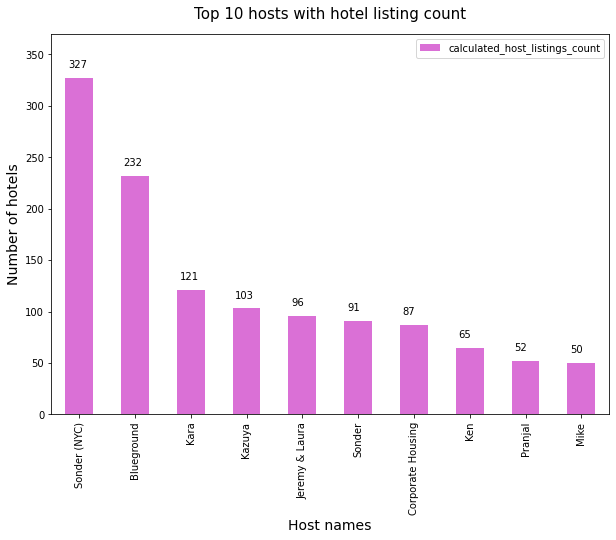

     Host id          Host name neighbourhood_group  \
0  219517861       Sonder (NYC)           Manhattan   
1  107434423         Blueground           Manhattan   
2   30283594               Kara            Brooklyn   
3  137358866             Kazuya           Manhattan   
4   16098958     Jeremy & Laura           Manhattan   
5   12243051             Sonder              Queens   
6   61391963  Corporate Housing            Brooklyn   
7   22541573                Ken           Manhattan   
8  200380610            Pranjal           Manhattan   
9    1475015               Mike           Manhattan   

   calculated_host_listings_count  
0                             327  
1                             232  
2                             121  
3                             103  
4                              96  
5                              91  
6                              87  
7                              65  
8                              52  
9                              50 

In [22]:
calculated_host_listings_top_ten_list.iloc[:,2:].plot.bar(color = '#DA70D6')
x = [0,1,2,3,4,5,6,7,8,9]
plt.xticks(ticks = x ,labels = top_ten_host_names)
plt.title('Top 10 hosts with hotel listing count', pad = 15 , size = 15)
plt.xlabel('Host names', size =14)
plt.ylabel('Number of hotels' , size =14)
plt.ylim(top = 370)
for i in range(0,len(calculated_host_listings_top_ten_list)):
  plt.text(i-0.2,calculated_host_listings_top_ten_count_list[i]+10,s = calculated_host_listings_top_ten_count_list[i])
  
plt.show()
print(calculated_host_listings_top_ten_list)

# 3)ROOM TYPE VS AVERAGE PRICE PER ROOM

In [23]:
room_typewise_prices = df.groupby(['room_type'])['price'].mean()


In [24]:
room_typewise_prices_df = df.groupby(['room_type'] , as_index= False)['price'].mean()


In [25]:
room_typewise_prices = df.groupby(['room_type'])['price'].mean()

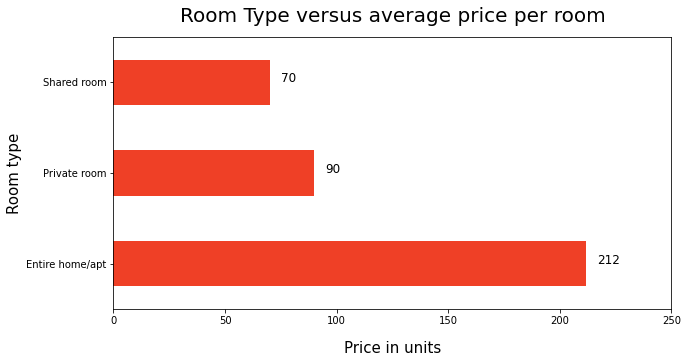

room_type
Entire home/apt    211.810918
Private room        89.809131
Shared room         70.248705
Name: price, dtype: float64


In [26]:
plt.rcParams['figure.figsize'] = (10, 5)
room_typewise_prices.plot.barh(color = '#EF4026')
plt.xlim(0,250)
plt.title('Room Type versus average price per room' , size = 20, pad = 15)
plt.xlabel('Price in units',size = 15, labelpad = 15)
plt.ylabel('Room type',size = 15)

for i in range(0,len(room_typewise_prices)):
  plt.text(room_typewise_prices[i] + 5 ,i, round(room_typewise_prices[i]), size = 12)

plt.show()
print(room_typewise_prices)

There are three types of rooms offered by hotels.

Entire home/apt is expensive when compared to other two room types.

Shared rooms are cheaper when compared to other two room type


FROM THE ABOVE GRAPH IT IS CLEARLY SHOW THAT ENTIRE HOME/APARTMENT IS MOSTLY PREFERED


# ROOM TYPE VS PRICE DEPENDENT

In [27]:
neighbourhood_group_wise_price = df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

In [28]:
neighbourhood_group_wise_price

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.890937,59.800000
Brooklyn,178.346202,76.545428,50.773723
Manhattan,249.257994,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [29]:
neighbourhood_group_wise_price.sort_values('Entire home/apt',inplace= True , ascending = False)

In [30]:
neighbourhood_group_wise_price['Entire home/apt']

neighbourhood_group
Manhattan        249.257994
Brooklyn         178.346202
Staten Island    173.846591
Queens           147.050573
Bronx            127.506596
Name: Entire home/apt, dtype: float64

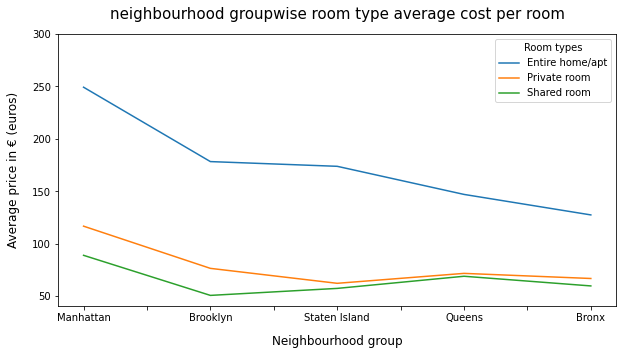

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Manhattan                 249.257994    116.776622    88.977083
Brooklyn                  178.346202     76.545428    50.773723
Staten Island             173.846591     62.292553    57.444444
Queens                    147.050573     71.762456    69.020202
Bronx                     127.506596     66.890937    59.800000


In [31]:
neighbourhood_group_wise_price['Entire home/apt'].plot()
neighbourhood_group_wise_price['Private room'].plot()
neighbourhood_group_wise_price['Shared room'].plot()
plt.ylim(top = 300)
plt.title('neighbourhood groupwise room type average cost per room' , size = 15 , pad = 15)
plt.xlabel('Neighbourhood group' , size = 12 ,labelpad = 12)
plt.ylabel('Average price in € (euros)' , size = 12, labelpad = 12)
plt.legend(title = 'Room types')
plt.show()
print(neighbourhood_group_wise_price)

From the above Analysis we can say that most people prefer to stay in place where price is less.

#4) LOCATION OF HOST WRT ROOM TYPE  and TOTAL NO OF ROOM TYPES COUNT?

In [32]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
neighbourhood_wise_min_price = df.groupby(['neighbourhood_group','room_type'])['price'].min().unstack()
neighbourhood_wise_min_price = pd.DataFrame(neighbourhood_wise_min_price)

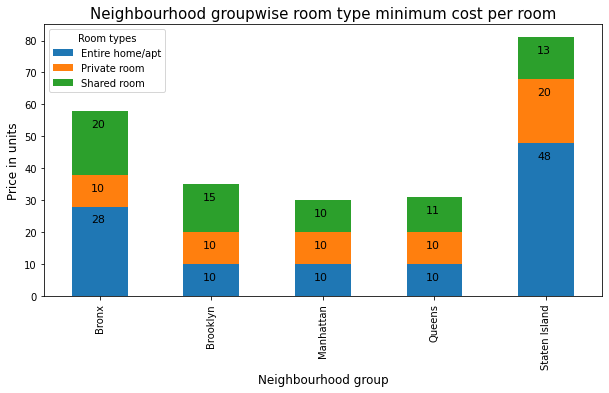

In [34]:
neighbourhood_wise_min_price.plot.bar(stacked = True, sort_columns = True  )
# plt.ylim(top = 500)
plt.title('Neighbourhood groupwise room type minimum cost per room' , size = 15 )
plt.xlabel('Neighbourhood group' , size = 12 )
plt.ylabel('Price in units' , size = 12)
plt.legend(title = 'Room types')
for i in range(0,len(neighbourhood_wise_min_price)):
  sums =0
  for room_type in neighbourhood_wise_min_price.columns.tolist():
    sums += neighbourhood_wise_min_price[room_type][i]
    plt.text(i-0.08,sums-5,round(neighbourhood_wise_min_price[room_type][i]) , size =11)



# MAXIMUM NUMBER OF ROOMS

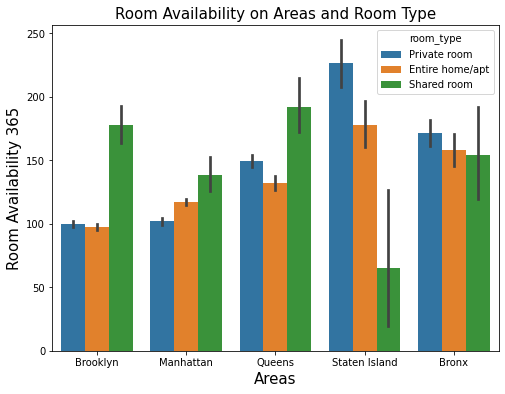

In [35]:
#maximum number of rooms

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=df, x='neighbourhood_group', y='availability_365', hue='room_type')

plt.title("Room Availability on Areas and Room Type", size=15)
plt.xlabel("Areas", size=15)
plt.ylabel("Room Availability 365", size=15)
           
plt.show()

* FROM THE ABOVE ANALYIS IT IS CLEARLY SHOW THAT PRIVATE ROOMS ARE MOSTLY AVAILABLE THROUGHOUT THE YEAR


# LOCATION OF NEIGHBOURHOOD GROUPS VS VARIATION OF PRICE BASED ON LOCATION

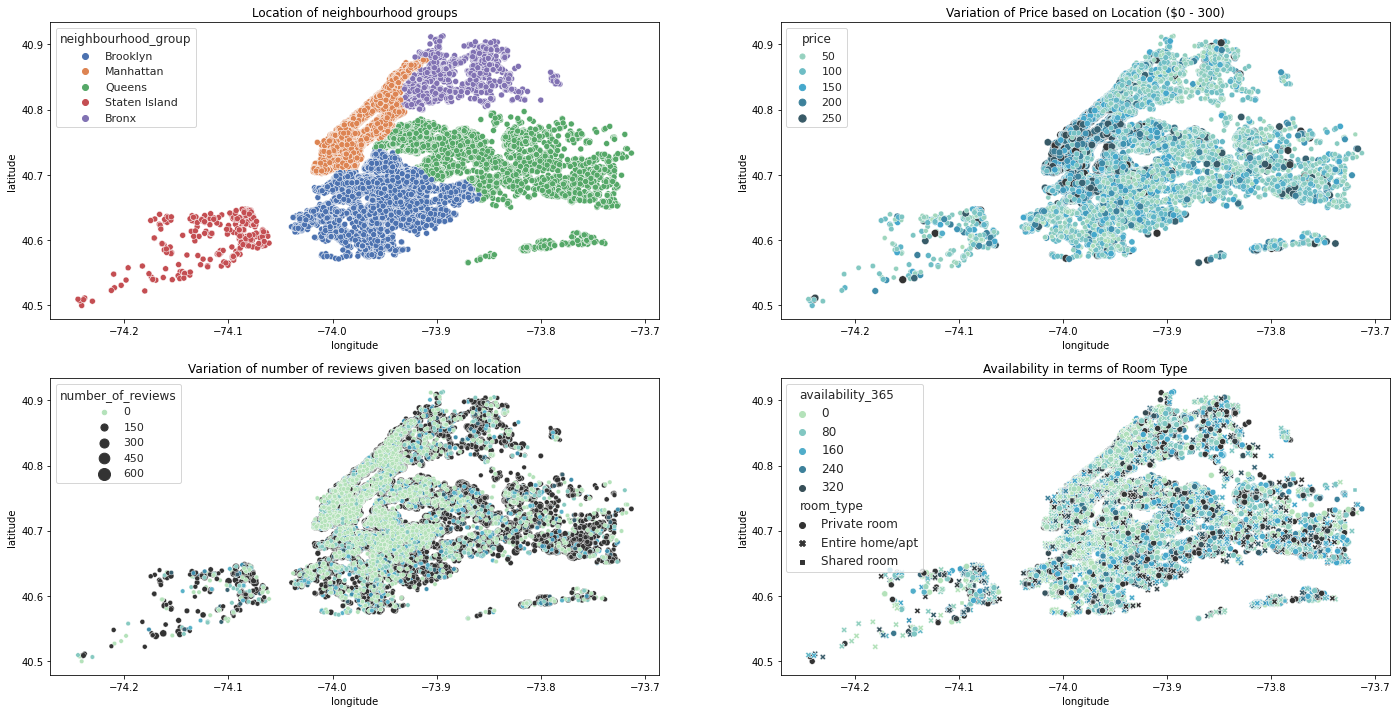

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
ax = axes.flatten()

sns.set_theme(style="white")
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', ax=ax[0]);
ax[0].set_title('Location of neighbourhood groups')
sns.scatterplot(data=df[df['price'] < 300], x='longitude', y='latitude', hue='price', size="price", sizes=(20, 60), palette='GnBu_d', ax=ax[1])
ax[1].set_title('Variation of Price based on Location ($0 - 300)')
sns.scatterplot(data=df, x='longitude', y='latitude', hue='number_of_reviews', size="number_of_reviews", sizes=(20, 150), palette='GnBu_d', hue_norm=(0, 5), ax=ax[2])
ax[2].set_title('Variation of number of reviews given based on location')
sns.scatterplot(data=df, x='longitude', y='latitude', hue='availability_365', style="room_type", palette='GnBu_d', ax=ax[3])
ax[3].set_title('Availability in terms of Room Type')
plt.show()

#Let's talk about the plots mentioned above.
The first plot shows the neighbourhood of New York City to which our dataset currently belongs. Because our 75th percentile data is in the range of USD 175, we only considered listings with a price range of up to USD 300 in the second plot. We can examine how price variations are distributed throughout the city. The areas south of Manhattan and north of Brooklyn are among the most expensive in New York. (From timeout.com.) The third plot shows a rising trend in the number of reviews on the outskirts of the city.
We attempted to visualise availability in terms of room type in the previous plot. Availability varies by room type.
 Though availability based on room type is spreaded well, still we can follow a pattern where the heart of new york stays the busiest or booked for most of the time.


CONCLUSION
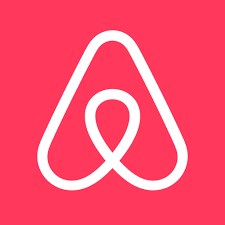


Most visitors prefer private rooms or the entire home over shared rooms.
Manhattan and Brooklyn are New York's two most distinguished, expensive, and affluent neighbourhoods.
Though the location of a property has a strong influence on its price, a property in a popular location does not guarantee that it will be occupied the majority of the time.
Because the features in this dataset are of very poor quality in determining property valuation, performing a regression on it may result in a high error rate. The corelation heatmap demonstrates this. We would require additional features such as bedrooms, bathrooms, property age (which I believe is very important), tax rate applicable on land, room extra amenities, and distance to nearest hospital, stores, or schools. These characteristics may have a strong relationship with price.
A time series analysis could be used to predict the occupancy rate at a specific time of the month or season.

It would be preferable if we had average guest ratings for a property; this would help us understand the property better and could also be a factor in deciding price (a low rated property tends to lower their price).